<a href="https://colab.research.google.com/github/AnnizaMega/talent-app-streamlit/blob/main/Data_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Read Excel with all sheets
excel = pd.ExcelFile("/content/Copy of Copy of Study Case DA.xlsx")  # not .csv anymore!

# Save each sheet to its own CSV file
for sheet in excel.sheet_names:
    df = pd.read_excel(excel, sheet_name=sheet)
    df.to_csv(f"{sheet}.csv", index=False)
    print(f"Saved: {sheet}.csv")


Saved: Talent Variable (TV) & Talent G.csv
Saved: dim_companies.csv
Saved: dim_areas.csv
Saved: dim_positions.csv
Saved: dim_departments.csv
Saved: dim_divisions.csv
Saved: dim_directorates.csv
Saved: dim_grades.csv
Saved: dim_education.csv
Saved: dim_majors.csv
Saved: dim_competency_pillars.csv
Saved: employees.csv
Saved: profiles_psych.csv
Saved: papi_scores.csv
Saved: strengths.csv
Saved: performance_yearly.csv
Saved: competencies_yearly.csv


In [ ]:
csv_name = "/content/Study Case DA.csv"  # change this if the file name is different

# A small helper to handle different encodings or delimiters automatically
def read_csv_safely(path):
    try:
        return pd.read_csv(path)  # default: UTF-8, comma-separated
    except Exception as e1:
        try:
            return pd.read_csv(path, encoding="utf-8-sig")
        except Exception as e2:
            # fallback: semicolon-separated (common in non-English CSV exports)
            return pd.read_csv(path, encoding="utf-8-sig", sep=";")

employees = read_csv_safely(csv_name)
employees.head()

,employee_id,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_months
0,EMP100000,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64
1,EMP100001,Wulan Setiawan,476388,4,4,4,5,5,3,1,1,2,16
2,EMP100002,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,58
3,EMP100003,Oka Halim,751615,1,3,4,2,1,1,2,2,5,15
4,EMP100004,Dwi Pratama,443809,3,4,6,5,3,3,1,1,5,34


In [ ]:
print("Data shape:", employees.shape)  # (rows, columns)
print("\nColumn names:")
print(employees.columns.tolist())

print("\nColumn info:")
print(employees.info())

print("\nMissing values per column:")
print(employees.isna().sum())

Data shape: (2010, 13)

Column names:
['employee_id', 'fullname', 'nip', 'company_id', 'area_id', 'position_id', 'department_id', 'division_id', 'directorate_id', 'grade_id', 'education_id', 'major_id', 'years_of_service_months']

Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   employee_id              2010 non-null   object
 1   fullname                 2010 non-null   object
 2   nip                      2010 non-null   int64 
 3   company_id               2010 non-null   int64 
 4   area_id                  2010 non-null   int64 
 5   position_id              2010 non-null   int64 
 6   department_id            2010 non-null   int64 
 7   division_id              2010 non-null   int64 
 8   directorate_id           2010 non-null   int64 
 9   grade_id                 2010 non-null   int64 
 10  educatio

In [ ]:
# Display the first 10 rows
employees.head(10)

# Summarize selected columns if they exist
cols_key = [
    "employee_id","fullname","company_id","area_id","position_id",
    "department_id","division_id","directorate_id","grade_id",
    "education_id","major_id","years_of_service_months"
]
available_cols = [c for c in cols_key if c in employees.columns]
employees[available_cols].describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
employee_id,2010,2010,DUP3452,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fullname,2010,2010,Fitri Anugrah Subekti,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_id,2010.0,NaN,NaN,NaN,2.49801,1.108924,1.0,2.0,2.0,3.0,4.0
area_id,2010.0,NaN,NaN,NaN,2.468159,1.132897,1.0,1.0,2.0,3.0,4.0
position_id,2010.0,NaN,NaN,NaN,3.502985,1.682706,1.0,2.0,4.0,5.0,6.0
department_id,2010.0,NaN,NaN,NaN,3.527363,1.680414,1.0,2.0,4.0,5.0,6.0
division_id,2010.0,NaN,NaN,NaN,3.032836,1.409248,1.0,2.0,3.0,4.0,5.0
directorate_id,2010.0,NaN,NaN,NaN,2.034826,0.814736,1.0,1.0,2.0,3.0,3.0
grade_id,2010.0,NaN,NaN,NaN,1.997512,0.818826,1.0,1.0,2.0,3.0,3.0
education_id,2010.0,NaN,NaN,NaN,2.464677,1.107015,1.0,1.0,2.0,3.0,4.0


In [ ]:
employees.columns = [c.strip().lower() for c in employees.columns]
employees.head(3)

,employee_id,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_months
0,EMP100000,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64
1,EMP100001,Wulan Setiawan,476388,4,4,4,5,5,3,1,1,2,16
2,EMP100002,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,58


In [ ]:
numeric_cols = [
    "company_id","area_id","position_id","department_id","division_id",
    "directorate_id","grade_id","education_id","major_id","years_of_service_months"
]
for c in numeric_cols:
    if c in employees.columns:
        employees[c] = pd.to_numeric(employees[c], errors="coerce")

employees[["years_of_service_months"]].describe()

,years_of_service_months
count,2010.000000
mean,50.124378
std,25.181580
min,0.000000
25%,32.000000
50%,50.000000
75%,66.000000
max,149.000000


In [ ]:
employees["employee_id"].nunique(), employees.shape[0]

(2010, 2010)

In [ ]:
numeric_cols = [
    "company_id","area_id","position_id","department_id",
    "division_id","directorate_id","grade_id",
    "education_id","major_id","years_of_service_months"
]
for c in numeric_cols:
    if c in employees.columns:
        employees[c] = pd.to_numeric(employees[c], errors="coerce")

In [ ]:
# Negative or extreme service months?
employees.query("years_of_service_months < 0 or years_of_service_months > 600")

# Missing grade or education?
employees[employees["grade_id"].isna()][["employee_id","fullname"]].head()

,employee_id,fullname


In [ ]:
employees.info()
employees.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   employee_id              2010 non-null   object
 1   fullname                 2010 non-null   object
 2   nip                      2010 non-null   int64 
 3   company_id               2010 non-null   int64 
 4   area_id                  2010 non-null   int64 
 5   position_id              2010 non-null   int64 
 6   department_id            2010 non-null   int64 
 7   division_id              2010 non-null   int64 
 8   directorate_id           2010 non-null   int64 
 9   grade_id                 2010 non-null   int64 
 10  education_id             2010 non-null   int64 
 11  major_id                 2010 non-null   int64 
 12  years_of_service_months  2010 non-null   int64 
dtypes: int64(11), object(2)
memory usage: 204.3+ KB


,employee_id,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_months
0,EMP100000,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64
1,EMP100001,Wulan Setiawan,476388,4,4,4,5,5,3,1,1,2,16
2,EMP100002,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,58
3,EMP100003,Oka Halim,751615,1,3,4,2,1,1,2,2,5,15
4,EMP100004,Dwi Pratama,443809,3,4,6,5,3,3,1,1,5,34


In [ ]:
df = pd.read_csv("performance_yearly.csv")

# pastikan kolom numeric
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

# hitung median (hanya dari nilai valid)
median_rating = df["rating"].median()

# isi nilai kosong dengan median
df["rating"] = df["rating"].fillna(median_rating)

df.to_csv("performance_yearly_clean.csv", index=False)
print(f"✅ Cleaned and saved. Missing ratings replaced with median ({median_rating:.2f})")


✅ Cleaned and saved. Missing ratings replaced with median (3.00)


In [ ]:

df = pd.read_csv("competencies_yearly.csv", dtype=str)
df.columns = [c.strip().lower() for c in df.columns]

# pastikan kolom wajib ada
required = ["employee_id", "year", "pillar_code", "score"]
missing = [c for c in required if c not in df.columns]
print("Missing columns:", missing)  # harusnya []

# cast tipe
df["year"] = pd.to_numeric(df["year"], errors="coerce").astype("Int64")
df["score"] = pd.to_numeric(df["score"], errors="coerce")  # empty/aneh -> NaN

# ---- Strategi imputasi yang lebih masuk akal ----
# skor kompetensi biasanya 1–5; isi yang kosong pakai MEDIAN per pilar
pillar_median = df.groupby("pillar_code")["score"].transform("median")
df["score"] = df["score"].fillna(pillar_median)

# jika masih ada NaN (mis. satu pilar seluruhnya kosong), fallback ke 3.0 (tengah 1–5)
df["score"] = df["score"].fillna(3.0)

# bulatkan 1 desimal (opsional)
df["score"] = df["score"].round(1)

# simpan
df.to_csv("competencies_yearly_clean.csv", index=False)
print("✅ Saved: competencies_yearly_clean.csv")


Missing columns: []
✅ Saved: competencies_yearly_clean.csv


In [ ]:
# % missing score before and after
raw = pd.read_csv("competencies_yearly.csv")
before = pd.to_numeric(raw.get("score"), errors="coerce").isna().mean()

clean = pd.read_csv("competencies_yearly_clean.csv")
after = clean["score"].isna().mean()
print(f"Missing before: {before:.1%}  |  after: {after:.1%}")


Missing before: 10.7%  |  after: 0.0%


In [ ]:
df = pd.read_csv("competencies_yearly_clean.csv")

# duplicates check
dupes = df[df.duplicated(subset=["employee_id", "year", "pillar_code"], keep=False)]

print(f"Total duplicate rows: {dupes.shape[0]}")
dupes.head(10)


Total duplicate rows: 0


,employee_id,score,pillar_code,year


In [ ]:
import re

# Load original file
df = pd.read_csv("profiles_psych.csv", dtype=str)
df.columns = [c.strip().lower() for c in df.columns]

# Convert numeric columns safely
num_cols = ["pauli", "faxtor", "iq", "gtq", "tiki"]
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Replace blanks / NaN with median of the column
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

# Replace text blanks with "Unknown"
text_cols = ["disc", "disc_word", "mbti"]
for c in text_cols:
    df[c] = df[c].fillna("Unknown")

# --- adding DISC based on DISC_WORD ---

# mapping word disc
map_disc = {
    "dominant": "D",
    "influencer": "I",
    "steadiness": "S",
    "conscientious": "C"
}

def derive_disc(code_phrase: str):
    if not isinstance(code_phrase, str) or not code_phrase.strip():
        return None
    # pisahkan jadi kata, abaikan tanda baca
    tokens = re.split(r"[^A-Za-z]+", code_phrase.strip().lower())
    tokens = [t for t in tokens if t]
    letters = [map_disc.get(t) for t in tokens if t in map_disc]
    if not letters:
        return None
    return "".join(letters)

# if disc unknown, filled from disc_word
df["disc_filled"] = df.apply(
    lambda r: r["disc"] if r["disc"] != "Unknown" else derive_disc(r["disc_word"]),
    axis=1
)

# replace disc column with new result
df["disc"] = df["disc_filled"].fillna("Unknown")
df.drop(columns=["disc_filled"], inplace=True)

# Save clean version
df.to_csv("profiles_psych_clean.csv", index=False)
print("✅ Saved: profiles_psych_clean.csv — blanks replaced & DISC derived from DISC_WORD")


✅ Saved: profiles_psych_clean.csv — blanks replaced & DISC derived from DISC_WORD


In [ ]:
# 1) Load
df = pd.read_csv("papi_scores.csv", dtype=str)
df.columns = [c.strip().lower() for c in df.columns]

# 2) Safety trim
for c in ["employee_id", "scale_code", "score"]:
    if c in df.columns:
        df[c] = df[c].astype(str).str.strip()

# 3) Normalize score -> numeric ("" or unkwon -> NaN)
df["score"] = pd.to_numeric(df["score"], errors="coerce")

# 4) Input median by scale_code (reasonalbe then 0)
med_per_scale = df.groupby("scale_code")["score"].transform("median")
df["score"] = df["score"].fillna(med_per_scale)

# Fallback if still NaN (example. all scale empty)
df["score"] = df["score"].fillna(df["score"].median())

# 5) (Optional) validation scale_code 20 scale PAPI
# expected = {f"Papi_{x}" for x in list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")[:20]}  # sesuaikan kalau perlu
# df = df[df["scale_code"].isin(expected)]

# 6) Save
df.to_csv("papi_scores_clean.csv", index=False)
print("✅ Saved: papi_scores_clean.csv")


✅ Saved: papi_scores_clean.csv


In [ ]:
def normalize_name(s: str) -> str:
    return (
        str(s).strip().lower()
        .replace(" ", "_").replace("-", "_").replace(".", "_")
    )

def standardize_columns(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df.columns = [normalize_name(c) for c in df.columns]
    return df

def load_sheet_like(xl: pd.ExcelFile, expected: str) -> pd.DataFrame:
    """Ambil sheet dengan pendekatan 'mirip nama'."""
    sheet_names = xl.sheet_names
    norm_sheets = {normalize_name(s): s for s in sheet_names}
    exp = normalize_name(expected)
    if exp in norm_sheets:
        return xl.parse(norm_sheets[exp])
    toks = [t for t in exp.split("_") if t]
    cand = None
    for k, v in norm_sheets.items():
        if all(t in k for t in toks):
            cand = v; break
    if cand is None and norm_sheets:
        for k, v in norm_sheets.items():
            if toks and toks[0] in k:
                cand = v; break
    if cand:
        return xl.parse(cand)
    raise KeyError(f"Sheet '{expected}' tidak ditemukan. Sheets ada: {sheet_names}")

def to_int(s: pd.Series) -> pd.Series:
    return pd.to_numeric(s, errors="coerce").astype("Int64")

def to_float(s: pd.Series) -> pd.Series:
    return pd.to_numeric(s, errors="coerce")


In [ ]:
xl = pd.ExcelFile("/content/Copy of Copy of Study Case DA.xlsx")

employees              = standardize_columns(load_sheet_like(xl, "employees"))
performance_yearly     = standardize_columns(load_sheet_like(xl, "performance_yearly"))
profiles_psych         = standardize_columns(load_sheet_like(xl, "profiles_psych"))
competencies_yearly    = standardize_columns(load_sheet_like(xl, "competencies_yearly"))
dim_grades             = standardize_columns(load_sheet_like(xl, "dim_grades"))
dim_divisions          = standardize_columns(load_sheet_like(xl, "dim_divisions"))
dim_education          = standardize_columns(load_sheet_like(xl, "dim_education"))
dim_competency_pillars = standardize_columns(load_sheet_like(xl, "dim_competency_pillars"))

# dtype minimal that we needed
if "year" in performance_yearly.columns:
    performance_yearly["year"] = to_int(performance_yearly["year"])
if "rating" in performance_yearly.columns:
    performance_yearly["rating"] = to_float(performance_yearly["rating"])

for col in ["iq", "gtq", "tiki"]:
    if col in profiles_psych.columns:
        profiles_psych[col] = to_float(profiles_psych[col])

if "score" in competencies_yearly.columns:
    competencies_yearly["score"] = to_float(competencies_yearly["score"])
if "year" in competencies_yearly.columns:
    competencies_yearly["year"] = to_int(competencies_yearly["year"])


View v_high_performers (rating = 5)

In [ ]:
v_high_performers = (
    performance_yearly.loc[performance_yearly["rating"] == 5, ["employee_id", "year"]]
    .drop_duplicates()
    .reset_index(drop=True)
)
v_high_performers.head()


,employee_id,year
0,EMP100008,2021
1,EMP100021,2021
2,EMP100043,2021
3,EMP100049,2021
4,EMP100053,2021


High performers yearly

In [ ]:
hp_per_year = (
    v_high_performers.groupby("year", as_index=False)
    .size().rename(columns={"size": "total_high_performers"})
    .sort_values("year")
)
hp_per_year

,year,total_high_performers
0,2021,137
1,2022,184
2,2023,196
3,2024,196
4,2025,168


High performers by grade

In [ ]:
hp_grade = (
    v_high_performers
      .merge(employees[["employee_id", "grade_id"]], on="employee_id", how="left")
      .merge(dim_grades.rename(columns={"name": "grade_name"})[["grade_id", "grade_name"]], on="grade_id", how="left")
      .groupby("grade_name", as_index=False).size()
      .rename(columns={"size": "total_high_performers"})
      .sort_values("total_high_performers", ascending=False)
)
hp_grade


,grade_name,total_high_performers
0,III,309
1,IV,294
2,V,278


High performers per division

In [ ]:
hp_div = (
    v_high_performers
      .merge(employees[["employee_id", "division_id"]], on="employee_id", how="left")
      .merge(dim_divisions.rename(columns={"name": "division_name"})[["division_id", "division_name"]], on="division_id", how="left")
      .groupby("division_name", as_index=False).size()
      .rename(columns={"size": "total_high_performers"})
      .sort_values("total_high_performers", ascending=False)
)
hp_div


,division_name,total_high_performers
1,Operations,190
2,Product Dev,187
4,Talent Management,173
3,Sales,171
0,Digital Marketing,160


High performers by education

In [ ]:
hp_edu = (
    v_high_performers
      .merge(employees[["employee_id", "education_id"]], on="employee_id", how="left")
      .merge(dim_education.rename(columns={"name": "education_level"})[["education_id", "education_level"]], on="education_id", how="left")
      .groupby("education_level", as_index=False).size()
      .rename(columns={"size": "total_high_performers"})
      .sort_values("total_high_performers", ascending=False)
)
hp_edu


,education_level,total_high_performers
2,S2,259
1,S1,229
3,SMA,202
0,D3,191


High performers by DISC

In [ ]:
disc_col = "disc_word" if "disc_word" in profiles_psych.columns else ("disc" if "disc" in profiles_psych.columns else None)

if disc_col:
    hp_disc = (
        v_high_performers
          .merge(profiles_psych[["employee_id", disc_col]], on="employee_id", how="left")
          .groupby(disc_col, as_index=False).size()
          .rename(columns={"size": "total_high_performers"})
          .sort_values("total_high_performers", ascending=False)
    )
else:
    hp_disc = pd.DataFrame(columns=[disc_col or "disc", "total_high_performers"])

hp_disc


,disc_word,total_high_performers
1,Conscientious-Influencer,90
3,Dominant-Conscientious,90
4,Dominant-Influencer,82
2,Conscientious-Steadiness,79
10,Steadiness-Dominant,74
0,Conscientious-Dominant,70
9,Steadiness-Conscientious,70
11,Steadiness-Influencer,69
8,Influencer-Steadiness,68
5,Dominant-Steadiness,66


high performers by mbti

In [ ]:
if "mbti" in profiles_psych.columns:
    p_mbti = profiles_psych.copy()
    p_mbti["mbti_clean"] = p_mbti["mbti"].astype(str).str.strip().replace({"": np.nan}).fillna("Unknown")
    hp_mbti = (
        v_high_performers
          .merge(p_mbti[["employee_id", "mbti_clean"]], on="employee_id", how="left")
          .groupby("mbti_clean", as_index=False).size()
          .rename(columns={"size": "total_high_performers"})
          .sort_values("total_high_performers", ascending=False)
    )
else:
    hp_mbti = pd.DataFrame(columns=["mbti_clean", "total_high_performers"])

hp_mbti


,mbti_clean,total_high_performers
19,nan,70
1,ENFP,69
11,INTP,57
13,ISFP,55
9,INFP,55
3,ENTP,53
4,ESFJ,52
0,ENFJ,52
12,ISFJ,51
2,ENTJ,50


In [ ]:
hp_iq_gtq = v_high_performers.merge(profiles_psych[["employee_id", "iq", "gtq"]], on="employee_id", how="left")
iq_gtq_summary_hp = pd.DataFrame({
    "avg_iq":   [np.round(hp_iq_gtq["iq"].mean(), 2) if "iq" in hp_iq_gtq else np.nan],
    "avg_gtq":  [np.round(hp_iq_gtq["gtq"].mean(), 2) if "gtq" in hp_iq_gtq else np.nan],
    "min_iq":   [hp_iq_gtq["iq"].min() if "iq" in hp_iq_gtq else np.nan],
    "max_iq":   [hp_iq_gtq["iq"].max() if "iq" in hp_iq_gtq else np.nan],
    "min_gtq":  [hp_iq_gtq["gtq"].min() if "gtq" in hp_iq_gtq else np.nan],
    "max_gtq":  [hp_iq_gtq["gtq"].max() if "gtq" in hp_iq_gtq else np.nan],
})
iq_gtq_summary_hp


,avg_iq,avg_gtq,min_iq,max_iq,min_gtq,max_gtq
0,108.83,27.85,80.0,140.0,11.0,45.0


High performances by tiki score

In [ ]:
hp_tiki = v_high_performers.merge(profiles_psych[["employee_id", "tiki"]], on="employee_id", how="left")
tiki_summary_hp = pd.DataFrame({
    "avg_tiki": [np.round(hp_tiki["tiki"].mean(), 2) if "tiki" in hp_tiki else np.nan],
    "min_tiki": [hp_tiki["tiki"].min() if "tiki" in hp_tiki else np.nan],
    "max_tiki": [hp_tiki["tiki"].max() if "tiki" in hp_tiki else np.nan],
})
tiki_summary_hp

,avg_tiki,min_tiki,max_tiki
0,5.55,1,10


Pillar maping

In [ ]:
pillar_map = dim_competency_pillars.copy()
if "pillar_label" not in pillar_map.columns and "name" in pillar_map.columns:
    pillar_map = pillar_map.rename(columns={"name": "pillar_label"})

hp_comp = competencies_yearly.merge(v_high_performers, on=["employee_id", "year"], how="inner")

hp_comp_pillar = (
    hp_comp.merge(pillar_map[["pillar_code", "pillar_label"]], on="pillar_code", how="left")
    .groupby(["pillar_code", "pillar_label"], as_index=False)["score"].mean()
    .rename(columns={"score": "avg_score"})
    .assign(avg_score=lambda d: d["avg_score"].round(2))
    .sort_values("avg_score", ascending=False)
)
hp_comp_pillar


,pillar_code,pillar_label,avg_score
6,QDD,Quality Delivery Discipline,5.05
7,SEA,Social Empathy & Awareness,4.94
5,LIE,"Lead, Inspire & Empower",4.92
9,VCU,Value Creation for Users,4.90
2,FTC,Forward Thinking & Clarity,4.81
0,CEX,Curiosity & Experimentation,4.80
1,CSI,Commercial Savvy & Impact,4.80
8,STO,Synergy & Team Orientation,4.78
3,GDR,Growth Drive & Resilience,4.67
4,IDS,Insight & Decision Sharpness,4.65


In [ ]:
hp_comp_perf = (
    hp_comp
      .merge(performance_yearly[["employee_id", "year", "rating"]], on=["employee_id","year"], how="left")
      .merge(pillar_map[["pillar_code", "pillar_label"]], on="pillar_code", how="left")
      .groupby("pillar_label", as_index=False)
      .agg(avg_competency_score=("score", "mean"),
           avg_performance_rating=("rating", "mean"))
      .assign(avg_competency_score=lambda d: d["avg_competency_score"].round(2),
              avg_performance_rating=lambda d: d["avg_performance_rating"].round(2))
      .sort_values("avg_competency_score", ascending=False)
)
hp_comp_perf


,pillar_label,avg_competency_score,avg_performance_rating
6,Quality Delivery Discipline,5.05,5.0
7,Social Empathy & Awareness,4.94,5.0
5,"Lead, Inspire & Empower",4.92,5.0
9,Value Creation for Users,4.90,5.0
2,Forward Thinking & Clarity,4.81,5.0
0,Commercial Savvy & Impact,4.80,5.0
1,Curiosity & Experimentation,4.80,5.0
8,Synergy & Team Orientation,4.78,5.0
3,Growth Drive & Resilience,4.67,5.0
4,Insight & Decision Sharpness,4.65,5.0


Visualization

In [ ]:
import matplotlib.pyplot as plt

# opsi kualitas gambar
plt.rcParams["figure.dpi"] = 120
plt.rcParams["axes.grid"] = True


High performers by year

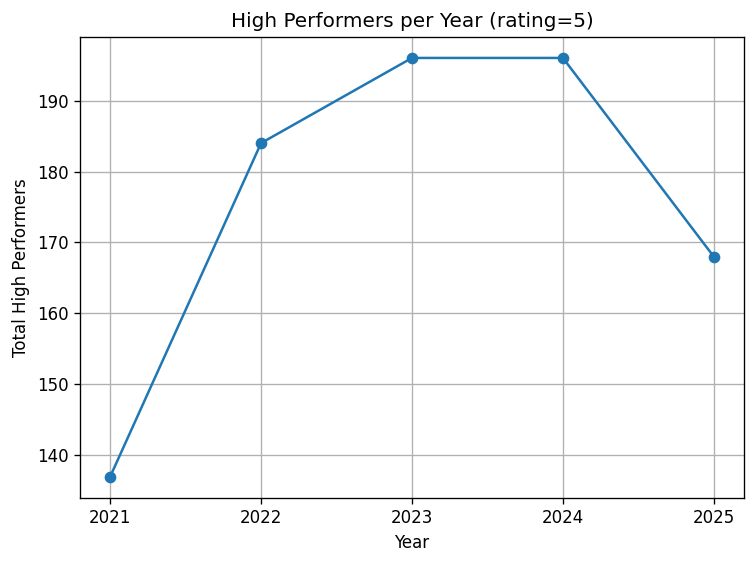

In [ ]:
plt.plot(hp_per_year["year"], hp_per_year["total_high_performers"], marker="o")
plt.title("High Performers per Year (rating=5)")
plt.xlabel("Year")
plt.ylabel("Total High Performers")
plt.xticks(hp_per_year["year"], [f"{int(y)}" for y in hp_per_year["year"]])  # format label
plt.tight_layout()
plt.show()


High Performers by Grade

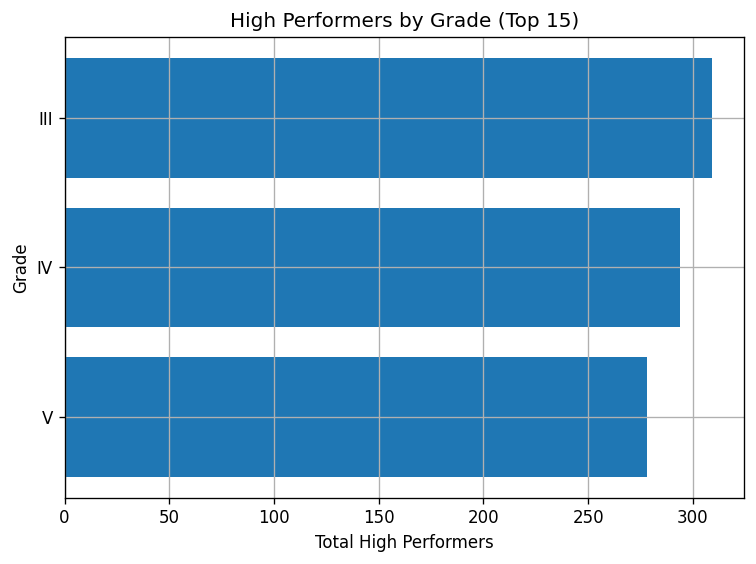

In [ ]:
N = 15  # showing top 15 grade
data = hp_grade.sort_values("total_high_performers", ascending=True).tail(N)
fig = plt.figure()
plt.barh(data["grade_name"], data["total_high_performers"])
plt.title(f"High Performers by Grade (Top {N})")
plt.xlabel("Total High Performers")
plt.ylabel("Grade")
plt.tight_layout()
plt.show()


High Performers by Division

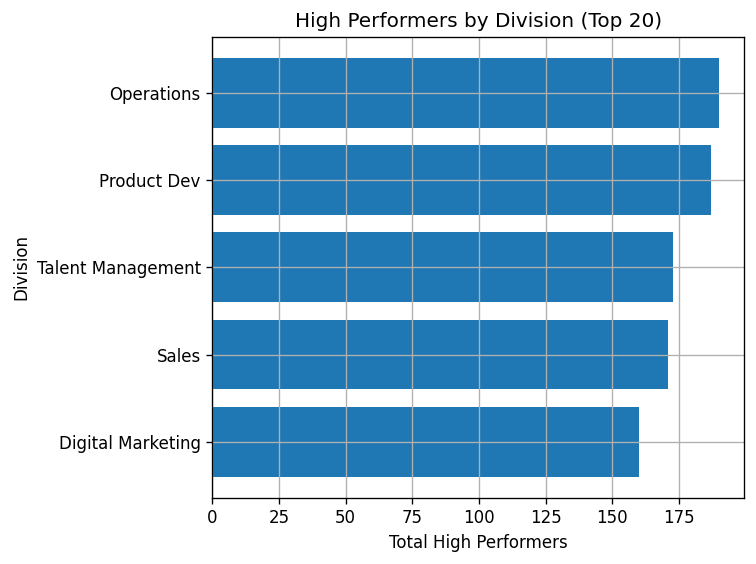

In [ ]:
N = 20  # top 20 division
data = hp_div.sort_values("total_high_performers", ascending=True).tail(N)
fig = plt.figure()
plt.barh(data["division_name"], data["total_high_performers"])
plt.title(f"High Performers by Division (Top {N})")
plt.xlabel("Total High Performers")
plt.ylabel("Division")
plt.tight_layout()
plt.show()

High Performers by Education level

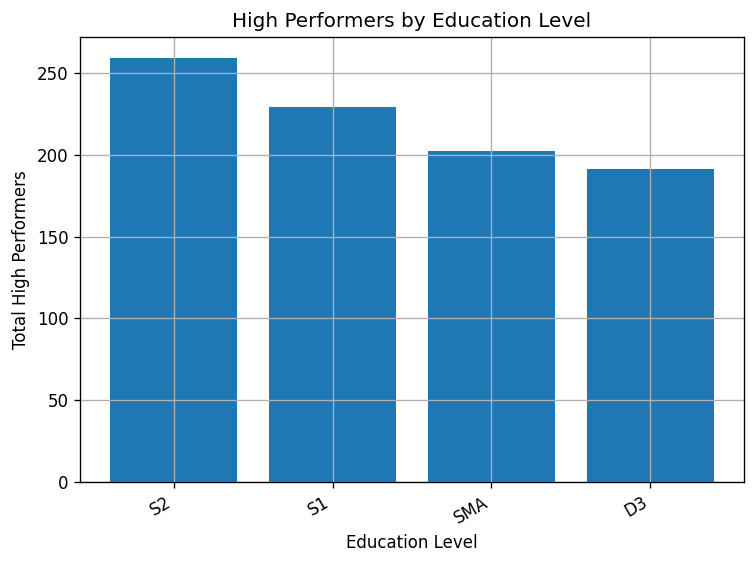

In [ ]:
data = hp_edu.sort_values("total_high_performers", ascending=False)
fig = plt.figure()
plt.bar(data["education_level"], data["total_high_performers"])
plt.title("High Performers by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Total High Performers")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


High Performers by DISC

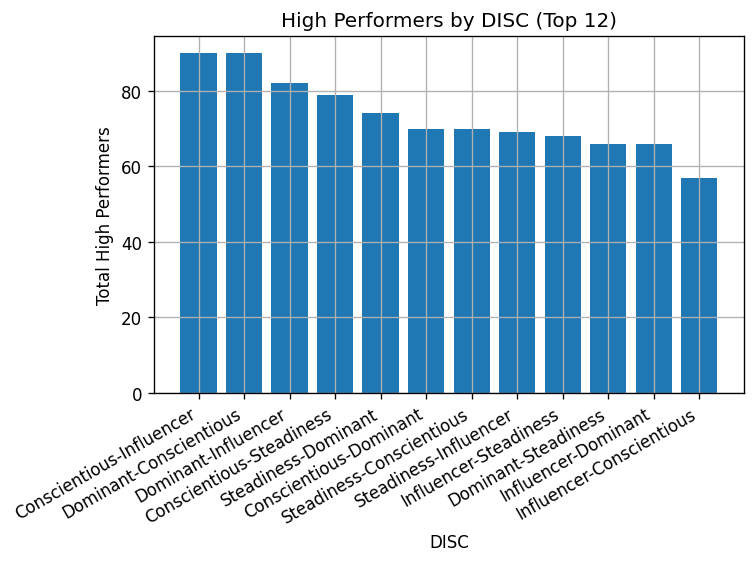

In [ ]:
if 'hp_disc' in globals() and not hp_disc.empty:
    N = 12
    data = hp_disc.sort_values("total_high_performers", ascending=False).head(N)
    fig = plt.figure()
    plt.bar(data[data.columns[0]], data["total_high_performers"])  # kolom pertama = disc label
    plt.title(f"High Performers by DISC (Top {N})")
    plt.xlabel("DISC")
    plt.ylabel("Total High Performers")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()


High Performers by MBTI type

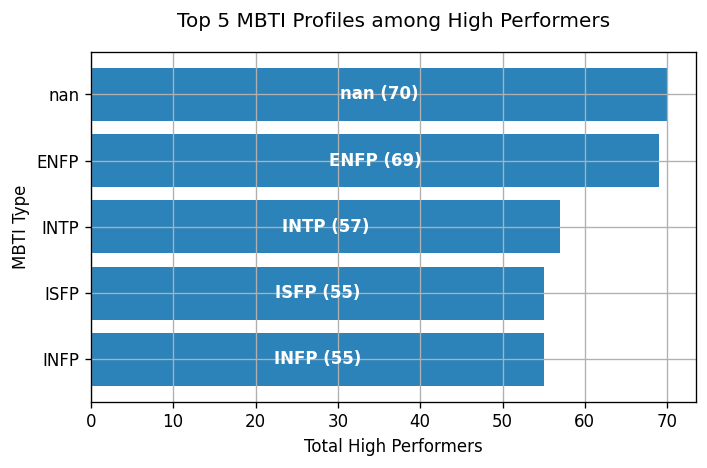

In [ ]:
# showing Top 5 MBTI dan label in the bar
top_n = 5
data = hp_mbti.sort_values("total_high_performers", ascending=False).head(top_n)

plt.figure(figsize=(6,4))
bars = plt.barh(data["mbti_clean"], data["total_high_performers"], color="#2b83ba")
plt.title(f"Top {top_n} MBTI Profiles among High Performers", pad=15)
plt.xlabel("Total High Performers")
plt.ylabel("MBTI Type")

# tulis nilai di dalam batang (dan tipe MBTI di sisi kiri)
for bar, mbti in zip(bars, data["mbti_clean"]):
    plt.text(bar.get_width()/2, bar.get_y() + bar.get_height()/2,
             f"{mbti} ({int(bar.get_width())})",
             ha="center", va="center", color="white", fontsize=10, fontweight="bold")

plt.gca().invert_yaxis()  # biar urutan dari atas ke bawah = terbesar ke terkecil
plt.tight_layout()
plt.show()


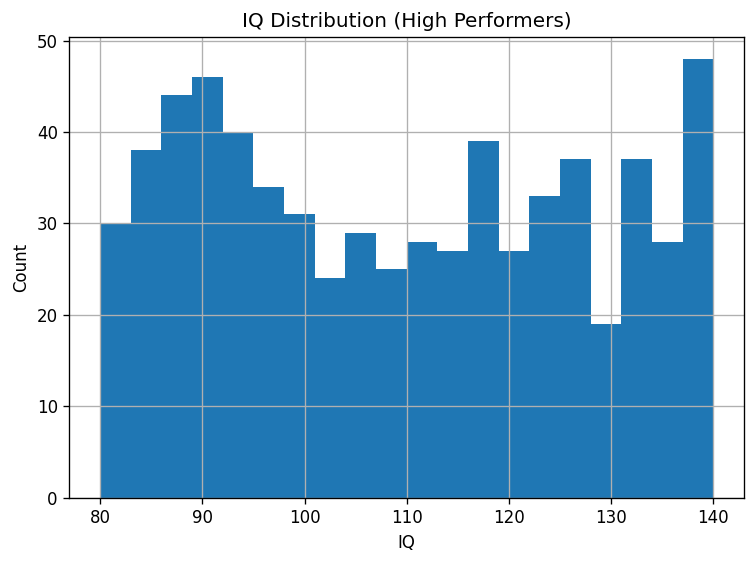

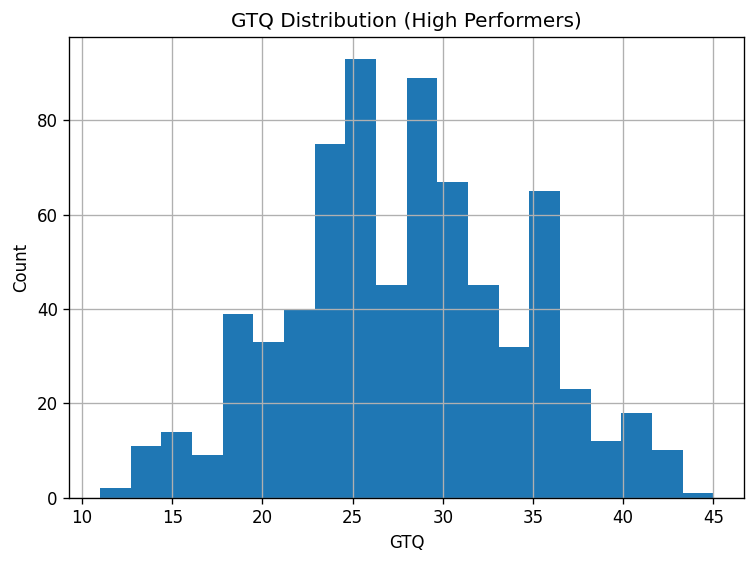

/tmp/ipython-input-1958577316.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([hp_iq_gtq_vals["iq"].dropna(), hp_iq_gtq_vals["gtq"].dropna()], labels=["IQ","GTQ"])


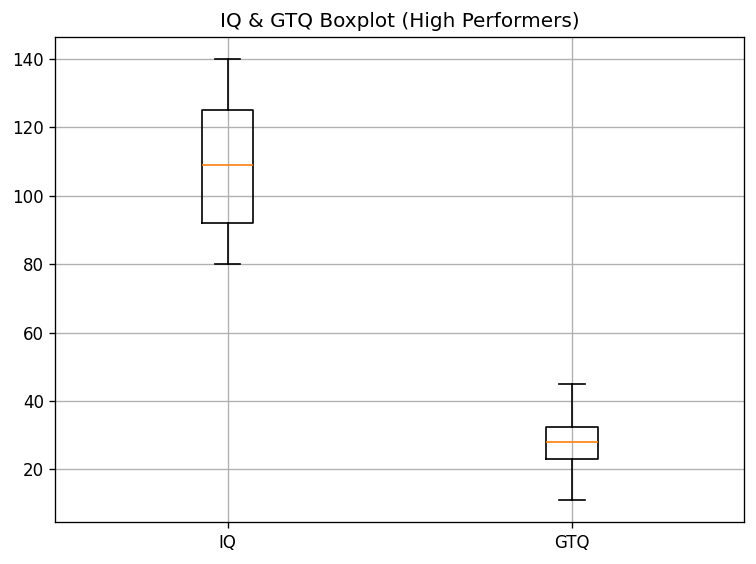

In [ ]:
# Merged value individual (isnt summary table) so we can plot it
hp_iq_gtq_vals = v_high_performers.merge(profiles_psych[["employee_id","iq","gtq"]], on="employee_id", how="left")

fig = plt.figure()
plt.hist(hp_iq_gtq_vals["iq"].dropna(), bins=20)
plt.title("IQ Distribution (High Performers)")
plt.xlabel("IQ")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

fig = plt.figure()
plt.hist(hp_iq_gtq_vals["gtq"].dropna(), bins=20)
plt.title("GTQ Distribution (High Performers)")
plt.xlabel("GTQ")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

fig = plt.figure()
plt.boxplot([hp_iq_gtq_vals["iq"].dropna(), hp_iq_gtq_vals["gtq"].dropna()], labels=["IQ","GTQ"])
plt.title("IQ & GTQ Boxplot (High Performers)")
plt.tight_layout()
plt.show()


In [ ]:
# EDA for TIKI (High Performers)
hp_tiki = v_high_performers.merge(
    profiles_psych[["employee_id", "tiki"]],
    on="employee_id", how="left"
)

tiki_summary_hp = pd.DataFrame({
    "avg_tiki": [round(hp_tiki["tiki"].mean(), 2)],
    "min_tiki": [hp_tiki["tiki"].min()],
    "max_tiki": [hp_tiki["tiki"].max()]
})

tiki_summary_hp


,avg_tiki,min_tiki,max_tiki
0,5.55,1,10


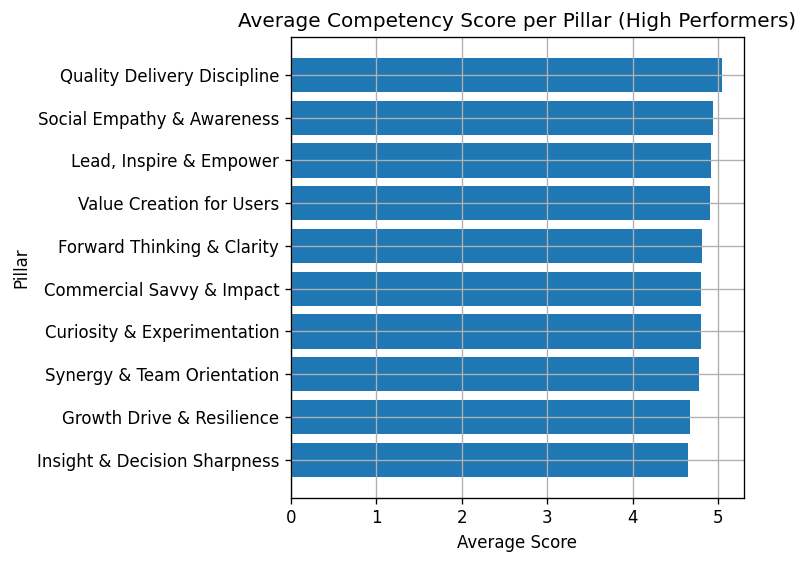

In [ ]:
data = hp_comp_pillar.sort_values("avg_score", ascending=True)
fig = plt.figure()
plt.barh(data["pillar_label"], data["avg_score"])
plt.title("Average Competency Score per Pillar (High Performers)")
plt.xlabel("Average Score")
plt.ylabel("Pillar")
plt.tight_layout()
plt.show()


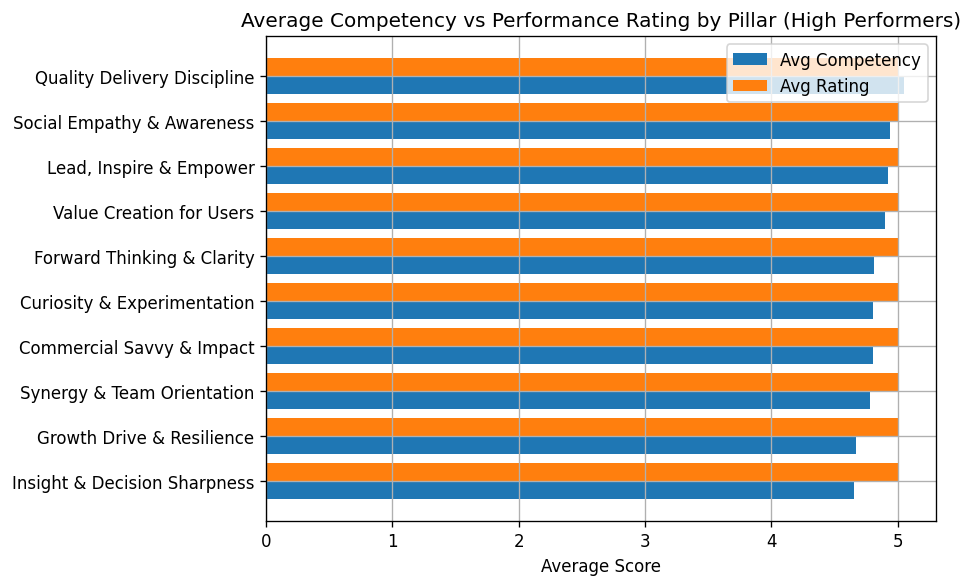

In [ ]:
# urutkan berdasarkan competency tertinggi
df = hp_comp_perf.sort_values("avg_competency_score", ascending=True)

x = np.arange(len(df))
width = 0.4

fig, ax = plt.subplots(figsize=(8,5))
ax.barh(x - width/2, df["avg_competency_score"], height=width, label="Avg Competency", color="#1f77b4")
ax.barh(x + width/2, df["avg_performance_rating"], height=width, label="Avg Rating", color="#ff7f0e")

ax.set_yticks(x)
ax.set_yticklabels(df["pillar_label"])
ax.set_xlabel("Average Score")
ax.set_title("Average Competency vs Performance Rating by Pillar (High Performers)")
ax.legend()

plt.tight_layout()
plt.show()
